**EXPLORATORY DATA ANALYSIS**

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/NYC_taxi.csv',parse_dates=['pickup_datetime'],nrows=500000)
print(df.head())

                             key  ...  passenger_count
0    2009-06-15 17:26:21.0000001  ...                1
1    2010-01-05 16:52:16.0000002  ...                1
2   2011-08-18 00:35:00.00000049  ...                2
3    2012-04-21 04:30:42.0000001  ...                1
4  2010-03-09 07:51:00.000000135  ...                1

[5 rows x 8 columns]


**GETTING THE DATA OF NYC USING COORDINATES**


In [8]:
#range of longitude for NYC
nyc_min_longitude=-74.05
nyc_max_longitude=-73.75

#range of latitude for NYC
nyc_min_latitude=40.63
nyc_max_latitude=40.85

df2=df.copy(deep=True)
#gathering all the data which is between the coordinates of the NYC
for long in ['pickup_longitude','dropoff_longitude']:
  df2=df2[(df2[long]>nyc_min_longitude) & (df2[long]<nyc_max_longitude)]

for long in ['pickup_latitude','dropoff_latitude']:
  df2=df2[(df2[long]>nyc_min_latitude) & (df2[long]<nyc_max_latitude)]

print(df2.head(5))

                             key  ...  passenger_count
0    2009-06-15 17:26:21.0000001  ...                1
1    2010-01-05 16:52:16.0000002  ...                1
2   2011-08-18 00:35:00.00000049  ...                2
3    2012-04-21 04:30:42.0000001  ...                1
4  2010-03-09 07:51:00.000000135  ...                1

[5 rows x 8 columns]


Making some landmarks

In [12]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

**VISUALIZING THE LANDMARKS ON MAP**

In [13]:
import matplotlib.pyplot as plt
def plot_lat_long(df,landmarks,points='Pickup'):
  plt.figure(figsize=(12,12))
  if points=='Pickup':
    plt.plot(list(df.pickup_longitude),list(df.pickup_latitude),'.',markersize=1)
  else:
    plt.plot(list(df.dropoff_longitude),list(df.dropoff_latitude),'.',markersize=1)
  for landmark in landmarks:
    plt.plot(landmarks[landmark][0],landmarks[landmark][1],'*',markersize=15,alpha=1,color='r')
    plt.annotate(landmark,(landmarks[landmark][0]+0.005,landmarks[landmark][1]+0.005),color='r',backgroundcolor='w')
  plt.title(f"{points} Locations in NYC Illustrated")
  plt.grid(None)
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")
  plt.show()

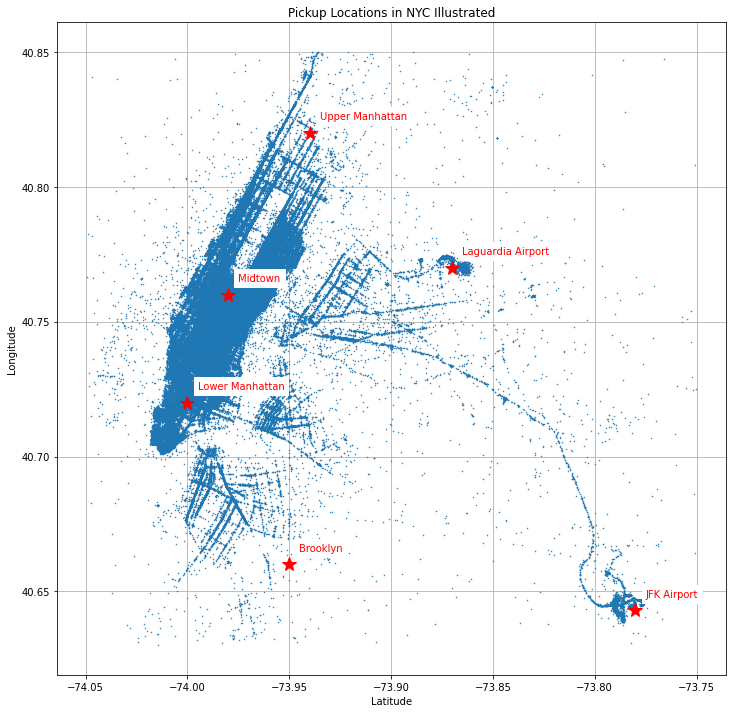

In [16]:
plot_lat_long(df2,landmarks,points='Pickup')

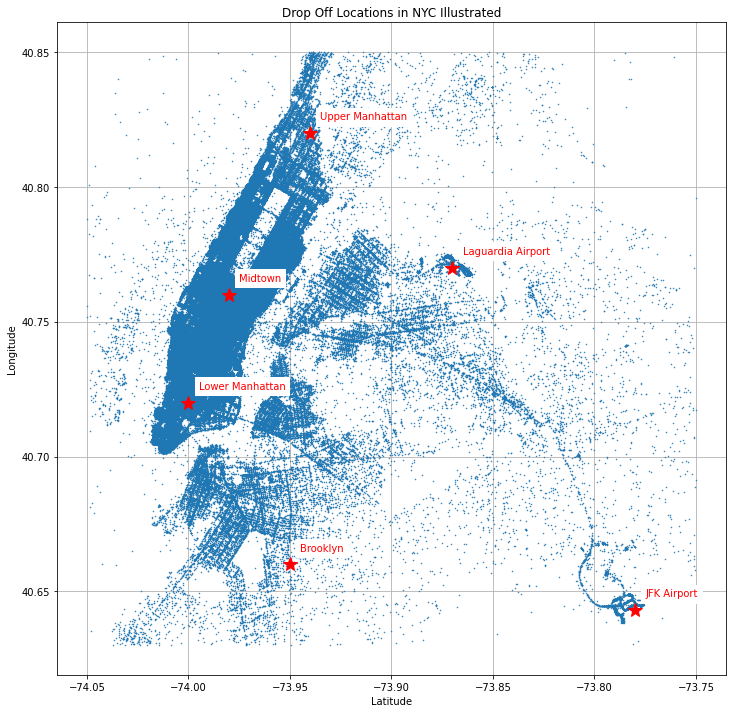

In [17]:
plot_lat_long(df2,landmarks,points='Drop Off')

**SEPERATING THE DATETIME INTO PARTS**

In [20]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['day_of_week']=df['pickup_datetime'].dt.dayofweek
df['hour']=df['pickup_datetime'].dt.hour

'''Since we have previously used the parse_dates parameter 
when we imported the data into pandas, we can easily identify 
and separate the year, month, day and hour components using the 
dt function in pandas'''

**VISUALIZING DISTRIBUTION OF RIDES THOUGHOUT THE WEEK**

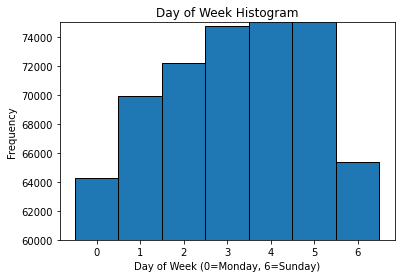

In [25]:
import numpy as np
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black',
                            ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

**DATA PREPROCESSING**

In [26]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


As we see in the description that fare price has negative value so lets plot the visualization to find out the error

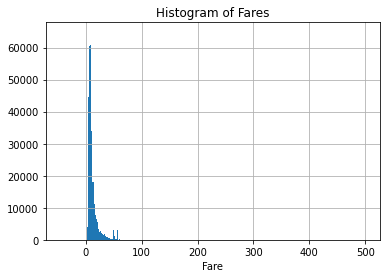

In [29]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

**lets check the passenger count**

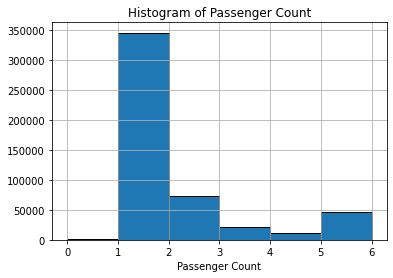

In [30]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [31]:
def preprocess(df):
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df
    
    # remove outliers in fare amount
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
      df = df[(df['fare_amount'] >= lower_bound) &(df['fare_amount'] <= upper_bound)]
      return df
    
    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode()
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode
        return df
    # remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75
        # range of latitude for NYC
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85
        # only consider locations within New York City
        for long in ['pickup_longitude', 'dropoff_longitude']:
            df = df[(df[long] > nyc_min_longitude) &
                    (df[long] < nyc_max_longitude)]
        for lat in ['pickup_latitude', 'dropoff_latitude']:
            df = df[(df[lat] > nyc_min_latitude) &
                    (df[lat] < nyc_max_latitude)]
        return df
    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0,
                                     upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df
preprocess(df)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12+00:00,-73.978775,40.766724,-73.966072,40.758537,1.0,2015,5,7,3,18
499996,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34+00:00,-74.002932,40.718408,-74.009442,40.710952,1.0,2010,9,13,0,12
499997,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20+00:00,-73.983885,40.725611,-73.896482,40.700980,1.0,2014,8,25,0,0
499998,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32+00:00,-73.974617,40.756512,-73.970184,40.764801,6.0,2015,1,12,0,12


**FEATURE ENGINEERING**

In [38]:
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df
    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)
    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'],
                                             df['pickup_longitude'],
                                             df['dropoff_latitude'],
                                             df['dropoff_longitude'])
        return df
    # create new column for the distance away from airports
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}
        for k in airports:
            df['pickup_dist_'+k]=euc_distance(df['pickup_latitude'],
                                              df['pickup_longitude'],
                                              airports[k][1],
                                              airports[k][0])
            df['dropoff_dist_'+k]=euc_distance(df['dropoff_latitude'],
                                               df['dropoff_longitude'],
                                               airports[k][1],
                                               airports[k][0])
        return df
    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df


**FEATURE SCALING

In [40]:
df_prescaled=df.copy()
df_scaled=df.drop(['fare_amount'],axis=1)
from sklearn.preprocessing import scale
df_scaled=scale(df_scaled)
cols=df.columns.tolist()
cols.remove('fare_amount')
df_scaled=pd.DataFrame(df_scaled,columns=cols,index=df.index)
df_scaled=pd.concat([df_scaled,df['fare_amount']],axis=1)
df=df_scaled.copy()

**BUILDING MODEL**

In [43]:
from re import S
x=df.loc[:,df.columns!='fare_amount']
y=df.loc[:,'fare_amount']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2304      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
12500/12500 [==============================] - 27s 2ms/step - loss: 205.5134 - mse: 205.5134
Epoch 2/200
12500/12500 [==============================] - 24s 2ms/step - loss: 205.4985 - mse: 205.4985
Epoch 3/200
12500/12500 [==============================] - 24s 2ms/step - loss: 205.4985 - mse: 205.4985
Epoch 4/200
12500/12500 [==============================] - 25s 2ms/step - loss: 205.4983 - mse: 205.4983
Epoch 5/200
12500/12500 [==============================] - 25s 2ms/step - loss: 205.4990 - mse: 205.4990
Epoch 6/200
12500/12500 [==============================] - 23s 2ms/step - loss: 205.4981 - mse: 205.4981
Epoch 7/200
12500/12500 [==============================] - 23s 2ms/step - loss: 205.4985 - mse: 205.4985
Epoch 8/200
12500/12500 [==============================] - 48s 4ms/step - loss: 205.4994 - mse: 205.4994
Epoch 9/200
12500/12500 [==============================] - 24s 2ms/step - loss: 205.4980 - mse: 205.4980
Epoch 10/200
12500/12500 [=============================

In [45]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0,
                                                              high=10000))
    idx = sample.index[0]
    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))
    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

In [46]:
predict_random(df_prescaled, x_test, model)

Trip Details: Monday, 12:00hrs
Actual fare: $12.00
Predicted fare: $1.00
RMSE: $11.00


In [47]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 14.34
Test RMSE: 14.36


In [50]:
print(x_test.head(4))

        pickup_longitude  ...  dropoff_dist_Newark_Airport
175354         -0.123346  ...                    -0.119412
258153         -0.122631  ...                    -0.116762
495552         -0.123741  ...                    -0.121002
24319          -0.125184  ...                    -0.124616

[4 rows x 17 columns]
